In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

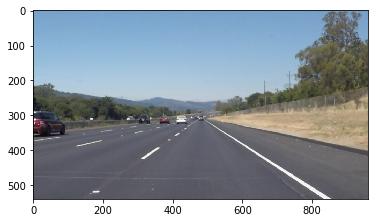

In [4]:
# img = cv2.imread('../test_images/solidWhiteRight.jpg')
img = mpimg.imread('../test_images/solidWhiteRight.jpg')
plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray, 75, 150)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, maxLineGap=250)

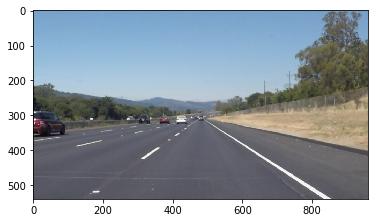

In [5]:
# img = cv2.imread('../test_images/solidWhiteRight.jpg')
img = mpimg.imread('../test_images/solidWhiteRight.jpg')
plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray, 75, 150)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, maxLineGap=250)

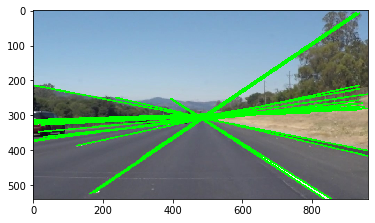

In [6]:
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 3)
plt.imshow(img)

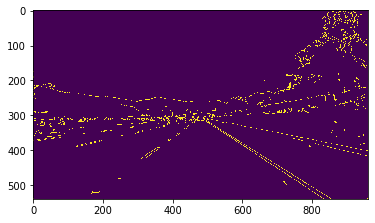

In [7]:
plt.imshow(edges)

# Test Video

In [9]:
video = cv2.VideoCapture('../test_videos/solidYellowLeft.mp4')

In [ ]:
while True:
    ret, frame = video.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    low_yellow = np.array([18, 94, 140])
    up_yellow = np.array([48, 255, 255])
    mask = cv2.inRange(hsv, low_yellow, up_yellow)
    edges = cv2.Canny(mask, 75, 150)
    
    if not ret:
        video = cv2.VideoCapture('../test_videos/solidWhiteRight.mp4')
        continue
    cv2.imshow("Frame", frame)
    cv2.imshow("edges", edges)
    
    key = cv2.waitKey(26)
    if key == 27:
        break
video.release()
cv2.destroyAllWindows()